# Data Wrangling Project

## 1. Gather

In [1]:
import pandas as pd
import requests
import os 
import tweepy
import json
import numpy as np

1. Read the WeRateDogs Twitter archive `twitter-archive-enhanced.csv`

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [138]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [139]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Download image predictions `image-predictions.tsv` using request protocol. 

In [140]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t' )

In [142]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [143]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use Python's `Tweepy` library to query each tweet in the WeRateDogs Twitter archive as JSON data and store JSON data to `tweet_json.txt` file.

In [10]:
consumer_key = 'consumer_kuy'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

error_list = {}
tweet_ids = twitter_archive.tweet_id.tolist()
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify =True)

with open ('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            t_json = tweet._json
            json.dump(t_json, outfile)
            outfile.write('\n')
    
        except tweepy.TweepError as e:
            print(str(tweet_id))
            print(e.api_code)
            error_list[tweet_id] = e.api_code

888202515573088257
144
873697596434513921
144
872668790621863937
144
872261713294495745
144
869988702071779329
144
866816280283807744
144
861769973181624320
144
856602993587888130
144
845459076796616705
144
844704788403113984
144
842892208864923648
144
837012587749474308
144
827228250799742977
144
812747805718642688
144
802247111496568832
144
775096608509886464
144
770743923962707968
144
Rate limit reached. Sleeping for: 729
754011816964026368
144
680055455951884288
144
Rate limit reached. Sleeping for: 732


In [5]:
tweet_data = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

with open ('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_data = tweet_data.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], columns=['tweet_id', 'retweet_count', 'favorite_count']))
        
tweet_data = tweet_data.reset_index(drop=True)

In [145]:
tweet_data.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8192,37558
1,892177421306343426,6059,32280
2,891815181378084864,4008,24318


In [146]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null object
retweet_count     2337 non-null object
favorite_count    2337 non-null object
dtypes: object(3)
memory usage: 54.9+ KB


Reference<br> 
[1]https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json "Convert Tweepy Status object into JSON"
[2]https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/ "Reading and Writing JSON to a File in Python"
[3]https://knowledge.udacity.com/questions/28389 "JSONDecodeError when reading "tweet_json.txt" file" 

In [147]:
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweet_data))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## 2. Assess

Detect and document at least eight (8) quality issues and two (2) tidiness issues in the following data frames. 
- twitter_archive 
- tweet_data
- image_predictions 

### VIsual Assessment

In [148]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [149]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [150]:
twitter_archive.duplicated().sum()

0

In [66]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [151]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [152]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [153]:
image_predictions.duplicated().sum()

0

In [154]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [155]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [156]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8192,37558
1,892177421306343426,6059,32280
2,891815181378084864,4008,24318
3,891689557279858688,8347,40906
4,891327558926688256,9040,39099
5,891087950875897856,3003,19663
6,890971913173991426,1985,11493
7,890729181411237888,18201,63365
8,890609185150312448,4121,27030
9,890240255349198849,7113,30972


In [157]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null object
retweet_count     2337 non-null object
favorite_count    2337 non-null object
dtypes: object(3)
memory usage: 54.9+ KB


In [158]:
tweet_data.duplicated().sum()

0

In [159]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2337,2337,2337
unique,2337,1703,1973
top,670804601705242624,245,0
freq,1,5,166


<strong>Quality Issue</strong>

`twitter_archive` :<br>
- Some of the tweets are missing urls in  `expanded_urls`.
- Missing values are filled as NaN and sometimes as None.
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and  retweeted_status_user_id are float.
- Errorness data type (timestamp, retweeted_status_timestamp should be datetime and doggo, floofer, pupper, puppo should be category)
- Some of the tweets are retweet. Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute.
- `name` contain unrelated strings (e.g.) quite, a , such ... etc
- Some of the values in `rating_numerator` are not properly extracted. (e.g.) 883482846933004288 is rated as 13.5 in the `text` but the rating numerator is extracted as 5.
- Tweet 685681090388975000 contains invalid value '14' in expanded_urls.
- Multiple duplicated entries in expanded_urls.

`image_predictions`:
- Some values in p1, p2 and p3 are capitalized.

`tweet_data` :
- Errorness data types (`tweet_id`, `retweet_count`, `favorite_count` are string).

<br>
- `tweet_id` should be string.

<strong>Tidiness Issue</strong><br>
`twitter_archive`:
- Four variables in one column (doggo, floofer, pupper, puppo)<br>

`image_predictions`:
- Ambiguity in column names (p1, p1_conf, p1_dog)


- Merge `tweet_data` and `image_predictions` into `twitter_archive`  dataframe.

## 3. Clean
Before start cleaning the data, create copies of each dataframe as `twitter_archive_clean`, `image_predition_clean`, `tweet_data_clean`

In [6]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

### Missing Data

`twitter_archive`: Some of the tweets are missing images meaning missing urls in expanded_urls.

#### Define
Delete rows with missing expanded urls using pandas' `dropna` function

#### Code

In [7]:
twitter_archive_clean.dropna(subset=['expanded_urls'], inplace=True)

#### Test

In [8]:
twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Tidiness issues

`twitter_archive` : 
- Four variables in one column (dog stages: doggo, floofer, pupper, puppo)

Referred to this [Udacity's Knowledge answer][1] 

[1]: https://knowledge.udacity.com/questions/40340 "combining dog stages into one column"

#### Define 
Concatenate dog stages from each colum (`doggo`, `floofer`, `pupper` and `puppo`) and fill in `dog_stage` column. 
Create conditionals based on `dog_stage` to update the values. 

#### Code

In [9]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.dog_stage.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [10]:
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'NoneNoneNoneNone', 'dog_stage'] = 'None'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggoNoneNoneNone', 'dog_stage'] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'NoneflooferNoneNone', 'dog_stage'] = 'floofer'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'NoneNonepupperNone', 'dog_stage'] = 'pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'NoneNoneNonepuppo', 'dog_stage'] = 'puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggoflooferNoneNone', 'dog_stage'] = 'doggo, flooer'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggoNonepupperNone', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggoNoneNonepuppo', 'dog_stage'] = 'doggo, puppo'

In [11]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [12]:
twitter_archive_clean.groupby('dog_stage')['tweet_id'].count()

dog_stage
None             1923
doggo              80
doggo, flooer       1
doggo, pupper      12
doggo, puppo        1
floofer             9
pupper            243
puppo              28
Name: tweet_id, dtype: int64

In [13]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None


`image_predictions` : Ambiguity in column names (p1, p1_conf, p1_dog)

#### Define 
Rename columns with [`rename`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)function



#### Code

In [14]:
image_predictions_clean.rename(index=str, columns={"p1": "prediction_1", "p1_conf": "p1_confidence_level", "p2": "prediction_2", "p2_conf": "p2_confidence_level", "p3": "prediction_3", "p3_conf": "p3_confidence_level"}, inplace=True)

#### Test

In [15]:
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,prediction_1,p1_confidence_level,p1_dog,prediction_2,p2_confidence_level,p2_dog,prediction_3,p3_confidence_level,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Quality issues

`twitter_archive` : 
- Missing values are filled as NaN and sometimes as None
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and  retweeted_status_user_id are float.

#### Define

Use `fillna` function to replace NaN with 0 and change data type to int using `astype` function. Replace 0 with None using `replace` function.

Reffered to [this StackOverFlow answer](https://stackoverflow.com/questions/17097236/replace-invalid-values-with-none-in-pandas-dataframe "Replace invalid values with None in Pandas DataFrame")



#### Code

In [16]:
col_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
twitter_archive_clean[col_list] = twitter_archive_clean[col_list].fillna(0)
twitter_archive_clean[col_list] = twitter_archive_clean[col_list].astype(int)
twitter_archive_clean[col_list] = twitter_archive_clean[col_list].replace({0: None})

#### Test

In [17]:
twitter_archive_clean[col_list].loc[30:32]

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id
31,None,None,None,None
32,None,None,886053734421102592,19607400


In [18]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null object
retweeted_status_user_id      180 non-null object
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
dog_stage                     2297 non-null object
dtypes: int64(3), object(11)
memory usage: 349.2+ KB


`twitter_archive` : Errorness data types
- timestamp, retweeted_status_timestamp should be datetime
- doggo, floofer, pupper, puppo should be category 

**note**<br>
- doggo, floofer, pupper and puppo colums are merged to dog_stage column, so make dog_stage column of type category. 

#### Define
Use `to_datetime` function, convert data type of `timestamp` and `retweeted_status_timestamp` to datetime.
Use `astype` function, convert data type of `dog_stage` to category.

#### Code

In [19]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_clean['retweeted_status_timestamp'])

In [20]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')

#### Test

In [21]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null object
retweeted_status_user_id      180 non-null object
retweeted_status_timestamp    180 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
dog_stage                     2297 non-null category
dtypes: category(1), datetime64[ns](2), int64(3), object(8)
memory usage: 333.9+ KB


`twitter_archive` : Some of the tweets are retweet. Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. 

#### Define
Using drop function, remove tweets where `retweeted_status_id` contain values. 

#### Code

In [22]:
retweet_ind = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].index
twitter_archive_clean.drop(retweet_ind, inplace=True)

#### Test

In [23]:
twitter_archive_clean.retweeted_status_id.notnull().sum()

0

`twitter_archive` : `name` contains unrelated strings (e.g.) quite, a , such ... etc 

#### Define
Extract strings starts with Uppercase characters using `str.extract` function with Regex. Replace NaN with None using `replace` function. 

#### Code 

In [24]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].str.extract('(^[A-Z]+[a-z0-9]+)')
twitter_archive_clean['name'].replace(np.nan, 'None', inplace=True)

#### Test

In [25]:
twitter_archive_clean['name'].sample(10)

1415      Rusty
1168     Oliver
1665       Taco
1728      Rocco
1353       None
955        Toby
2039     Marley
1870       None
590     Jeffrey
326     Charlie
Name: name, dtype: object

`twitter_archive` : Some of the values in `rating_numerator` are not properly extracted. (e.g.) 883482846933004288 is rated as 13.5 in the `text` but the rating numerator is extracted as 5.

#### Define
Use `contains` function with regex,extract the correct rating from `text`. Extract the correct rating using `extract` function with regex and replace `rating_numerator`.

#### Code

In [26]:
float_numerator = twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
float_numerator

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [27]:
d = float_numerator.text.str.extract(r"(\d+\.\d*\/\d+)")[0].str.strip('/').str[:-3].to_dict()
d

{45: '13.5', 695: '9.75', 763: '11.27', 1712: '11.26'}

In [28]:
for row in list(d.keys()):
    twitter_archive_clean.loc[row, 'rating_numerator'] = float(d[row])

#### Test

In [29]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


`image_prediction` : Some values in p1, p2 and p3 are capitalized.

#### Define 
Use `str.capitalize` function to capitalize values in `prediction_1`, `prediction_2` and `prediction_3`.

#### Code 

In [30]:
cap_cols = ['prediction_1', 'prediction_2', 'prediction_3']
for col in cap_cols:
    image_predictions_clean[col] = image_predictions_clean[col].str.capitalize()

#### Test

In [31]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,p1_confidence_level,p1_dog,prediction_2,p2_confidence_level,p2_dog,prediction_3,p3_confidence_level,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


`tweet_data`: Errorness data types (`tweet_id`, `retweet_count`, `favorite_count` are int). 


#### Define
Covert data types of `tweet_id`, `retweet_count` and `favorite_count` to string using pandas' `astype` function.

#### Code

In [32]:
tweet_data_clean = tweet_data_clean[['tweet_id', 'retweet_count', 'favorite_count']].astype(int)

#### Test

In [33]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


### Merge 
Merge `tweet_data` and `image_predictions` into `twitter_archive`  dataframe.

Merging these dataframes will solve the following quality issues as well.
- twitter_archive :Tweet 685681090388975000 contains invalid value '14' in expanded_urls.

#### Define 
Use `merge` function to merge `tweet_data` and `image_predictions` into `twitter_archive`  dataframe on tweet_id

#### Code

In [34]:
(twitter_archive_clean.tweet_id.count(), image_predictions_clean.tweet_id.count(),tweet_data_clean.tweet_id.count())

(2117, 2075, 2337)

In [35]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_data_clean, on=['tweet_id'], how= 'inner')

In [36]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on=['tweet_id'], how= 'inner')

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 27 columns):
tweet_id                      1990 non-null int64
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     1990 non-null datetime64[ns]
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1990 non-null object
rating_numerator              1990 non-null float64
rating_denominator            1990 non-null int64
name                          1990 non-null object
dog_stage                     1990 non-null category
retweet_count                 1990 non-null int64
favorite_count                1990 non-null int64
jpg_url                       1990 non-null object
img_num                 

### Quality and Tidiness issues
`twitter_archive` : Multiple duplicated entries in expanded_urls.

#### Define
1. Check the max count of comma in `expanded_urls` and create columns to store urls. 
2. Use `strip` function to extract each url in `expanded_urls` and store the urls to the url columns. 
3. Check if the columns contain the same urls and fill NaN if the values are the identical.
4. Concatenage the columns into one column named `urls` and remove unneccesary commmas. 
5. Remove the original `expanded_urls` and create `urls` as a new `expanded_urls`. 

Reffered to this answer in [StackOverflow](https://stackoverflow.com/questions/33158417/pandas-combine-two-strings-ignore-nan-values)

#### Code

In [38]:
url_list = twitter_archive_clean['expanded_urls'].tolist()

In [39]:
comma_count = []
for i in url_list:
    comma_count.append(str(i).count(','))

In [40]:
d = {'count':comma_count}
df_comma = pd.DataFrame(data=d)

In [41]:
df_comma.max()

count    4
dtype: int64

In [42]:
twitter_archive_clean['url_1'], twitter_archive_clean['url_2'],twitter_archive_clean['url_3'], twitter_archive_clean['url_4'], twitter_archive_clean['url_5'] = twitter_archive_clean['expanded_urls'].str.split(',').str

In [43]:
twitter_archive_clean.loc[twitter_archive_clean['url_1'].values == twitter_archive_clean['url_2'].values, 'url_2'] = np.nan
twitter_archive_clean.loc[twitter_archive_clean['url_1'].values == twitter_archive_clean['url_3'].values, 'url_3'] = np.nan
twitter_archive_clean.loc[twitter_archive_clean['url_1'].values == twitter_archive_clean['url_4'].values, 'url_4'] = np.nan
twitter_archive_clean.loc[twitter_archive_clean['url_1'].values == twitter_archive_clean['url_5'].values, 'url_5'] = np.nan

In [44]:
twitter_archive_clean['urls'] = twitter_archive_clean['url_1'] + ',' + twitter_archive_clean['url_2'].fillna('') + ','  + twitter_archive_clean['url_3'].fillna('') + ','  + twitter_archive_clean['url_4'].fillna('') + ','  + twitter_archive_clean['url_5'].fillna('') 

In [45]:
twitter_archive_clean['urls'] = twitter_archive_clean['urls'].str.strip(',,,,')
twitter_archive_clean['urls'] = twitter_archive_clean['urls'].str.strip(',,,')
twitter_archive_clean['urls'] = twitter_archive_clean['urls'].str.strip(',,')
twitter_archive_clean['urls'] = twitter_archive_clean['urls'].str.strip(',')

In [46]:
twitter_archive_clean.drop(['url_1','url_2', 'url_3', 'url_4', 'url_5', 'expanded_urls'], axis=1, inplace=True)
twitter_archive_clean.rename(index=str, columns = {'urls': 'expanded_urls'}, inplace=True)

#### Test

In [47]:
twitter_archive_clean['expanded_urls'].sample(10).values

array(['https://twitter.com/dog_rates/status/796484825502875648/photo/1',
       'https://twitter.com/dog_rates/status/739932936087216128/photo/1',
       'https://twitter.com/dog_rates/status/677187300187611136/photo/1',
       'https://twitter.com/dog_rates/status/877201837425926144/photo/1',
       'https://twitter.com/dog_rates/status/689905486972461056/photo/1',
       'https://twitter.com/dog_rates/status/786709082849828864/photo/1',
       'https://twitter.com/dog_rates/status/890609185150312448/photo/1',
       'https://twitter.com/dog_rates/status/787717603741622272/photo/1',
       'https://twitter.com/dog_rates/status/709409458133323776/photo/1',
       'https://twitter.com/dog_rates/status/667549055577362432/photo/1'], dtype=object)

 `tweet_id` should be string.

#### Define
Use `astype` function to convert `tweet_id` to strings. 

#### Code

In [50]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#### Test

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 0 to 1989
Data columns (total 27 columns):
tweet_id                      1990 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     1990 non-null datetime64[ns]
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
rating_numerator              1990 non-null float64
rating_denominator            1990 non-null int64
name                          1990 non-null object
dog_stage                     1990 non-null category
retweet_count                 1990 non-null int64
favorite_count                1990 non-null int64
jpg_url                       1990 non-null object
img_num                       1990 non-null int64
prediction_1                 

## Create a master data

In [53]:
twitter_archive_master = twitter_archive_clean.copy()

In [54]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## 4. Analysis and Visualization
In this  analysis and visualization part of the project, I will investigate the following 4 questions. 

**Questions**
1. Does the dog's rating have positive effect on retweet or favorite counts? By comparing the dogs with higher rating and the retweet and favorite counts of the tweet, analyse if dog ratings has strong corelation with favorite counts and retweet counts. 
2. Which types of dogs are rated higher? Is there any tendecy that some types of dogs are rated higher? Also, which type of dogs are tweeted most.  
3. Which stage of dogs are receiving more favorite counts and retweet counts ?

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:
df = pd.read_csv('twitter_archive_master.csv')

### 1. Does the dog's rating have positive effect on retweet or favorite counts? By comparing the dogs with higher rating and the retweet and favorite counts of the tweet, analyse if dog ratings has strong corelation with favorite counts and retweet counts. 

To investigate this research question, I will create a new column called `dog_rating`. Caliculate rate of dogs using rating_numerator and rating_denomicator and fill `dog_rating`. 

#### Define 
Devide `rating_numerator` by `rating_denomicator` and fill in newly created column `dog_rating`.
Reorder columns.

Reffered to [this StackOverflow answer](https://stackoverflow.com/questions/3849509/how-to-remove-n-from-a-list-element "How to remove \n from a list element?") to remove \n from a list element. 

#### Code

In [4]:
df['dog_rating'] = df['rating_numerator'] / df['rating_denominator']

#### Test

In [5]:
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,p1_confidence_level,p1_dog,prediction_2,p2_confidence_level,p2_dog,prediction_3,p3_confidence_level,p3_dog,expanded_urls,dog_rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13.0,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,https://twitter.com/dog_rates/status/892420643...,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13.0,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,https://twitter.com/dog_rates/status/892177421...,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12.0,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,https://twitter.com/dog_rates/status/891815181...,1.2


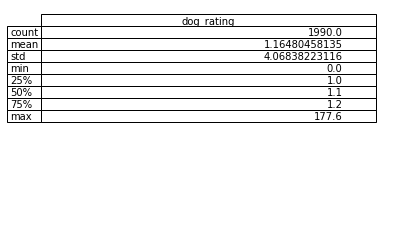

In [19]:
from pandas.plotting import table

desc = df.dog_rating.describe()
plot = plt.subplot(111, frame_on=False)
plot.xaxis.set_visible(False)
plot.yaxis.set_visible(False)
table(plot, desc,loc='upper right')

plt.savefig('desc_plot.png')

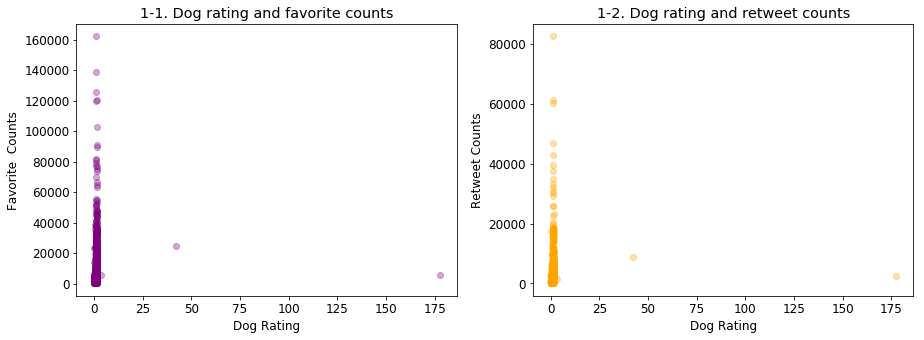

In [38]:
plt.figure(figsize = [15,5])
plt.rcParams["font.size"] = 12

plt.subplot(1,2,1)
sb.regplot(data = df, y = 'favorite_count', x = 'dog_rating', fit_reg =False,
           color='purple',x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' :1/3})
plt.title('1-1. Dog rating and favorite counts')
plt.xlabel('Dog Rating')
plt.ylabel('Favorite  Counts')

plt.subplot(1,2,2)
sb.regplot(data = df, y = 'retweet_count', x = 'dog_rating', fit_reg = False,
           color='orange',x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' :1/3})


plt.title('1-2. Dog rating and retweet counts')
plt.xlabel('Dog Rating')
plt.ylabel('Retweet Counts')


plt.tight_layout;
plt.savefig('q1.png')

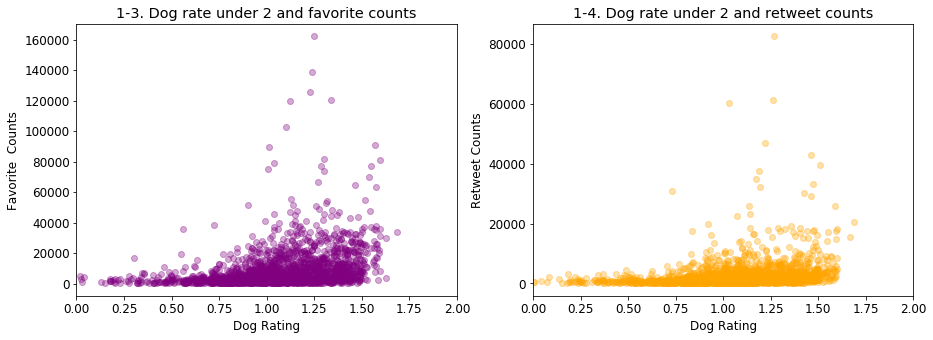

In [39]:
plt.figure(figsize = [15,5])
plt.rcParams["font.size"] = 12

plt.subplot(1,2,1)
sb.regplot(data = df, y = 'favorite_count', x = 'dog_rating',fit_reg =False,
           color='purple',x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' :1/3})
plt.title('1-3. Dog rate under 2 and favorite counts')
plt.xlabel('Dog Rating')
plt.ylabel('Favorite  Counts')
plt.xlim(0, 2)

plt.subplot(1,2,2)
sb.regplot(data = df, y = 'retweet_count', x = 'dog_rating', fit_reg = False,
           color='orange',x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' :1/3})


plt.title('1-4. Dog rate under 2 and retweet counts')
plt.xlabel('Dog Rating')
plt.ylabel('Retweet Counts')
plt.xlim(0, 2)

plt.tight_layout;
plt.savefig('q1_2.png')

The mean rate is 1.169 and the max rate is 177.6. And most of the favorite or retweet counts falls under the average rating of the dogs. So, this shows that tweet owners' ratings does not have any correlation with favorite counts or retweet counts.   

### 2. Which types of dogs are rated higher? Is there any tendecy that some types of dogs are rated higher? Also, which type of dogs are tweeted most. 

In [16]:
df['favorite_count'].mean(), df['retweet_count'].mean()

(8599.3859296482406, 2607.3849246231157)

In [6]:
p1_dogs = df[df.p1_dog == True]

In [18]:
p1_dogs[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,1473.000000,1473.000000
mean,2616.494908,8929.520027
std,4748.878607,12968.405661
min,11.000000,77.000000
25%,606.000000,2083.000000
50%,1337.000000,4246.000000
75%,3012.000000,11126.000000
max,82509.000000,162232.000000


In [101]:
p1_dogs.sort_values('favorite_count', ascending=False)[['tweet_id','prediction_1', 'favorite_count']].head(10)

,tweet_id,prediction_1,favorite_count
772,744234799360020481,Labrador_retriever,162232
307,822872901745569793,Lakeland_terrier,138571
398,807106840509214720,Chihuahua,125411
107,866450705531457537,French_bulldog,120537
807,739238157791694849,Eskimo_dog,119927
58,879415818425184262,English_springer,102848
331,819004803107983360,Standard_poodle,91154
92,870374049280663552,Golden_retriever,81051
65,877736472329191424,Chesapeake_bay_retriever,77475
33,884925521741709313,Italian_greyhound,75094


In [5]:
base_color = sb.color_palette()[0]

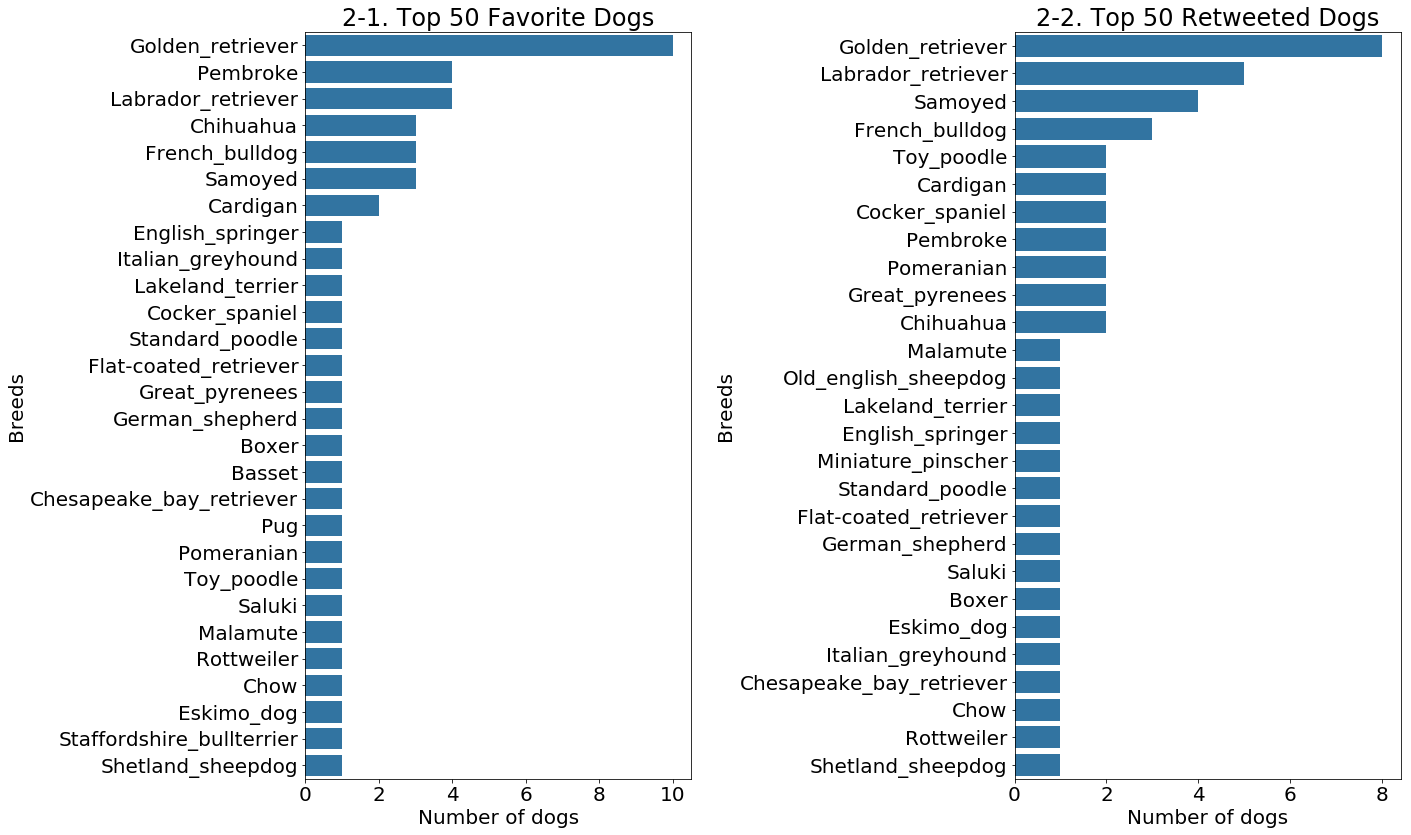

In [19]:
plt.figure(figsize = [20,12])
plt.rcParams["font.size"] = 20

# Subplot one for top 50 favorite dogs
plt.subplot(1,2,1)
top50_favorite = p1_dogs.sort_values('favorite_count', ascending=False)[['tweet_id','prediction_1', 'favorite_count']].head(50)
dog_order = top50_favorite['prediction_1'].value_counts().index
sb.countplot(data = top50_favorite, y = 'prediction_1', color = base_color,
            order = dog_order)
plt.title('2-1. Top 50 Favorite Dogs')
plt.ylabel('Breeds')
plt.xlabel('Number of dogs');

#subplot two for top 50 favorite dogs
plt.subplot(1,2,2)
top50_retweet = p1_dogs.sort_values('retweet_count', ascending=False)[['tweet_id','prediction_1', 'retweet_count']].head(50)
dog_order = top50_retweet['prediction_1'].value_counts().index
sb.countplot(data = top50_retweet, y = 'prediction_1', color = base_color,
            order = dog_order)
plt.title('2-2. Top 50 Retweeted Dogs')
plt.ylabel('Breeds')
plt.xlabel('Number of dogs')


plt.tight_layout();
plt.savefig('q2.png')

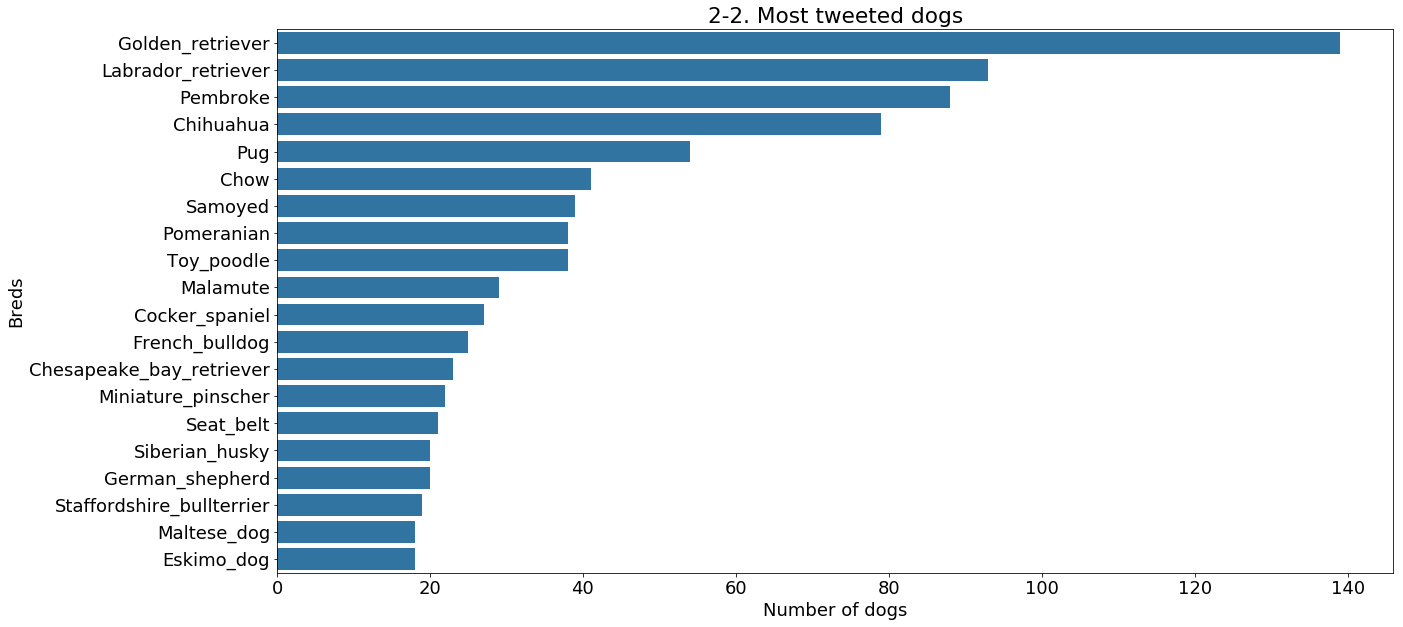

In [20]:
plt.figure(figsize = [20,10])
plt.rcParams["font.size"] = 18

most_tweeted_dogs = df.groupby('prediction_1', as_index=False)['tweet_id'].count().sort_values(by='tweet_id', ascending=False).head(20)
sb.barplot(data = most_tweeted_dogs, y = 'prediction_1', x = 'tweet_id', color = base_color)

plt.title('2-2. Most tweeted dogs')
plt.ylabel('Breds')
plt.xlabel('Number of dogs');
plt.savefig('q2_2.png')

In [12]:
 p1_dogs.sort_values('favorite_count', ascending=False)[['tweet_id','prediction_1', 'favorite_count']].head(10)

,tweet_id,prediction_1,favorite_count
772,744234799360020481,Labrador_retriever,162232
307,822872901745569793,Lakeland_terrier,138571
398,807106840509214720,Chihuahua,125411
107,866450705531457537,French_bulldog,120537
807,739238157791694849,Eskimo_dog,119927
58,879415818425184262,English_springer,102848
331,819004803107983360,Standard_poodle,91154
92,870374049280663552,Golden_retriever,81051
65,877736472329191424,Chesapeake_bay_retriever,77475
33,884925521741709313,Italian_greyhound,75094


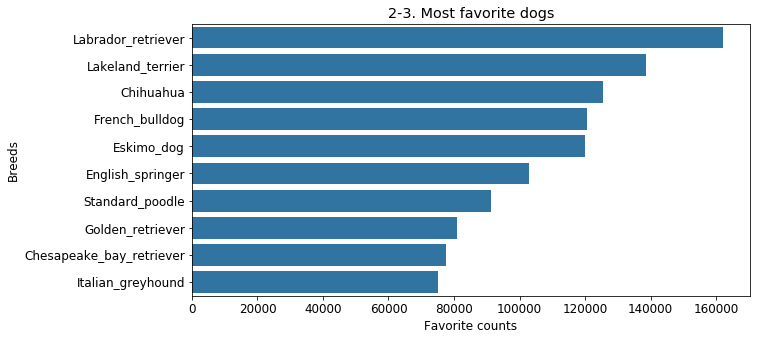

In [21]:
plt.figure(figsize = [10,5])
plt.rcParams["font.size"] = 12

most_favorited_dogs = p1_dogs.sort_values('favorite_count', ascending=False)[['tweet_id','prediction_1', 'favorite_count']].head(10)
sb.barplot(data = most_favorited_dogs, y = 'prediction_1', x = 'favorite_count', color = base_color)


plt.title('2-3. Most favorite dogs')
plt.ylabel('Breeds')
plt.xlabel('Favorite counts');
plt.savefig('q2_3.png')

**Summary**

Based on the top 20 favorite counts and tweet counts dogs, Golden Retriever ranked the first. Also Golden Retrievers are the most tweeted dogs in WeRateDogs. 

However, the dog receiving the highest favorite counts is Labrador Retriever. Based on `Most tweeted dog` bar chart, Labrador Retriever placed at the 2nd most tweeted dogs with a big differene from the 1st place. However, by looking at the favorite counts, Labrador Retriver won going away with favorite counts of 162232 compared to the top Golden Retriever with favorite counts of 81051.  

### 3. Which stage of dogs are receiving more favorite counts and retweet counts ?

In [23]:
dog_stage = df.groupby('dog_stage')

In [24]:
dog_stage['favorite_count','retweet_count'].mean()

,favorite_count,retweet_count
dog_stage,,
None,8146.554632,2419.543943
doggo,19842.841270,6968.126984
"doggo, flooer",16336.000000,3222.000000
"doggo, pupper",12862.000000,3945.222222
"doggo, puppo",45730.000000,18047.000000
floofer,12518.000000,4619.000000
pupper,6920.261084,2215.891626
puppo,21528.090909,6193.500000


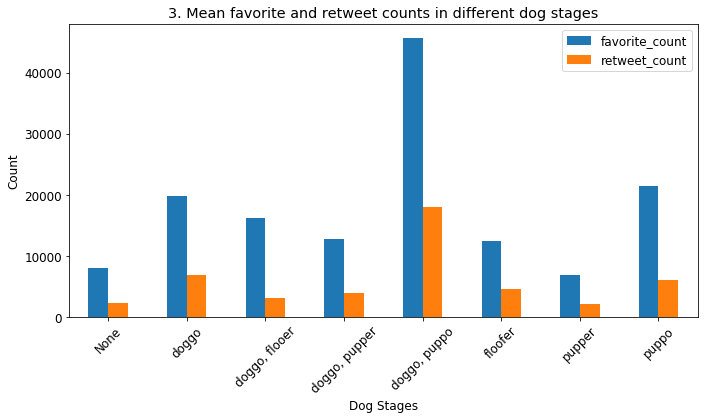

In [36]:


dog_stage = df.groupby('dog_stage')
dog_stage['favorite_count','retweet_count'].mean().plot(kind='bar', figsize=(10,6));
plt.title('3. Mean favorite and retweet counts in different dog stages')
plt.ylabel('Count')
plt.xlabel('Dog Stages');
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('q3.png')


**Summary** 

Based on `Dog stages and favorite/retweet count` bar chart, the dog stages with doggo and puppo is receiving both favorite and retweet count. 